<a href="https://colab.research.google.com/github/Umutoniwasepie/sustainable_tourism_model_evaluation/blob/main/Sustainable_tourism_summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sustainable Tourism Impact Classification using Machine Learning

This notebook aims to classify sustainable tourism activities based on environmental impact (low vs. high) using machine learning models. We will implement two models:
1. **Vanilla Model**: A basic neural network without optimizations.
2. **Optimized Model**: An enhanced neural network with optimizations including dropout, Adam optimizer, and early stopping.

## Objectives:
- Train and evaluate a vanilla neural network as the baseline model.
- Train and evaluate an optimized neural network using advanced techniques.
- Compare the performance of both models using metrics like accuracy, confusion matrix, and classification report.


In [86]:
!pip install tensorflow
!pip install keras

## Imports

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.regularizers import l2

**Mount Drive**

In [88]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Loading and acquisition

In [91]:
# Load the dataset
data = pd.read_csv('sustainable_Tourism_dataset.csv')

# Display the first few rows
print(data.head(10))
print(f"Dataset shape: {data.shape}")

# Summarize the data
print(data.describe())

# Check for missing values
print(f"Missing values:\n{data.isnull().sum()}")


   co2_emissions  energy_consumption  tourism_activity  impact
0      12.483571         3119.484349         36.496434       1
1       9.308678         2739.706946         47.109627       1
2      13.238443         2047.704296         34.151602       1
3      17.615149         1482.450578         43.840769       1
4       8.829233         2558.578651         12.127707       1
5       8.829315         2314.788308         54.265874       0
6      17.896064         2716.154576         50.024110       1
7      13.837174         2508.137441         33.658227       1
8       7.652628         2839.642172         63.184913       1
9      12.712800         1571.811831         68.751403       1
Dataset shape: (1000, 4)
       co2_emissions  energy_consumption  tourism_activity       impact
count    1000.000000         1000.000000       1000.000000  1000.000000
mean       10.132853         2066.130779         50.269214     0.530000
std         4.812218          775.608701         19.307351     0.4

Correlation matrix:
                    co2_emissions  energy_consumption  tourism_activity  \
co2_emissions            1.000000           -0.045311          0.025503   
energy_consumption      -0.045311            1.000000         -0.010116   
tourism_activity         0.025503           -0.010116          1.000000   
impact                   0.503579            0.425611         -0.003513   

                      impact  
co2_emissions       0.503579  
energy_consumption  0.425611  
tourism_activity   -0.003513  
impact              1.000000  


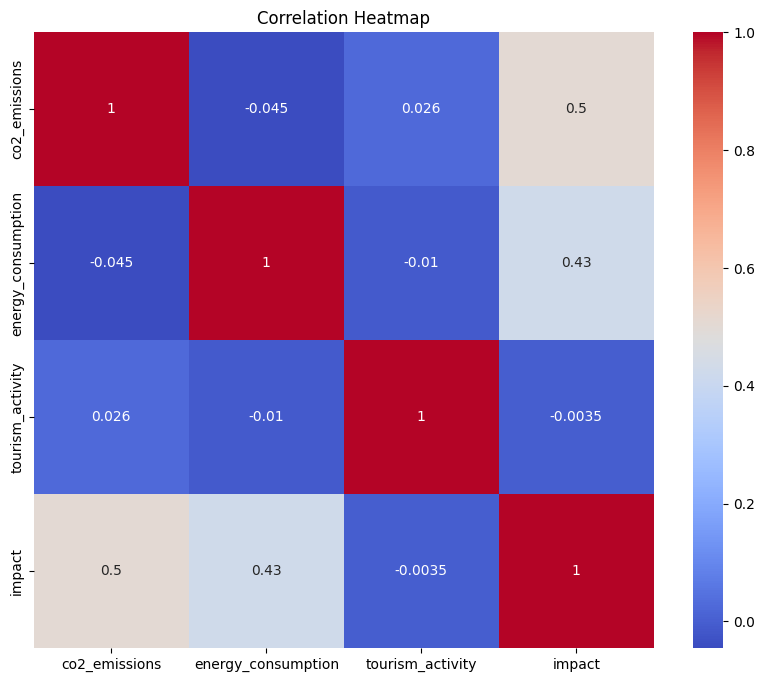

In [92]:
# Correlation analysis
correlation = data.corr()
print(f"Correlation matrix:\n{correlation}")

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Handling and Preprocessing

In [93]:
#Feature Selection
X=data.drop('impact', axis=1)
y=data['impact']

# Split the data: 60% training, 20% validation, 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Standardize the data
scaler= MinMaxScaler()
X_train_Scaled= scaler.fit_transform(X_train)
X_test_Scaled= scaler.transform(X_test)

In [41]:
X_train_Scaled.shape

(600, 3)

In [42]:
X_test_Scaled.shape

(200, 3)

## Basic Model Implementation



In [94]:
#Clear previous session
tf.keras.backend.clear_session()

# initialize the sequential model
vanilla_model=Sequential()

# Input layer
vanilla_model.add(Dense(64, activation='relu', input_dim=X_train_Scaled.shape[1]))

# Hidden layer
vanilla_model.add(Dense(32, activation='relu'))

# Output layer
vanilla_model.add(Dense(1, activation='sigmoid'))

# Compile with a simple SDG
vanilla_model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
# early_stop= EarlyStopping(monitor='val_loss', restore_best_weights=True, verbose=1, patience=5)

vanilla_model.summary()

# Fit the model
vanilla_model.fit(X_train_Scaled, y_train, epochs=20, validation_split=0.2,batch_size=32)

#Save the vanilla model
vanilla_model.save('saved_models/vanilla_model.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5546 - loss: 0.6765 - val_accuracy: 0.4917 - val_loss: 0.6719
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5751 - loss: 0.6560 - val_accuracy: 0.5333 - val_loss: 0.6557
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6321 - loss: 0.6375 - val_accuracy: 0.6083 - val_loss: 0.6362
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6943 - loss: 0.6240 - val_accuracy: 0.6417 - val_loss: 0.6168
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7470 - loss: 0.5928 - val_accuracy: 0.6917 - val_loss: 0.5935
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7470 - loss: 0.5767 - val_accuracy: 0.7000 - val_loss: 0.5706
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7466 - loss: 0.5660 - val_accuracy: 0.7000 - val_loss: 0.5517
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7816 - loss: 0.5206 - val_accuracy: 0.7917 - val_loss

### Evaluate the  Vanilla model

In [95]:
# Evaluate the model on the test set
test_loss, test_accuracy = vanilla_model.evaluate(X_test_Scaled, y_test)
print(f"Test Loss: {test_loss}\n, Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred_prob = vanilla_model.predict(X_test_Scaled)

# Convert probabilities to binary predictions (threshold > 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8678 - loss: 0.3469 
Test Loss: 0.36381420493125916
, Test Accuracy: 0.8349999785423279
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


### Error Analysis of the vanilla model

Confusion Matrix:
[[83 19]
 [14 84]]


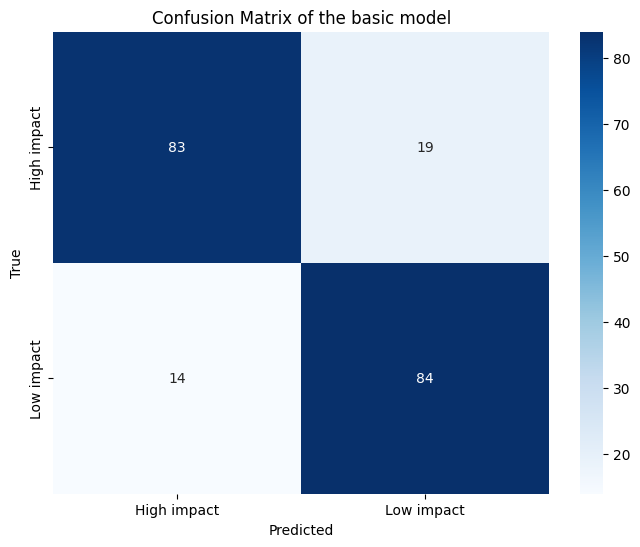

Classification Report:
                      precision    recall  f1-score   support

High impact activity       0.86      0.81      0.83       102
 Low impact activity       0.82      0.86      0.84        98

            accuracy                           0.83       200
           macro avg       0.84      0.84      0.83       200
        weighted avg       0.84      0.83      0.83       200



In [97]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High impact', 'Low impact'], yticklabels=['High impact', 'Low impact'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of the basic model')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['High impact activity', 'Low impact activity']))

# Model 2: Optimized Model Implementation

Here, the model incorporates optimization techniques—regularization, early stopping, and kernel_initializer—to improve performance.

In [108]:

# Clear previous session
tf.keras.backend.clear_session()

# Initialize the sequential model
optimized_model = Sequential()

# Input layer and first hidden layer with Dropout
optimized_model.add(Dense(64, input_dim=X_train_Scaled.shape[1], kernel_initializer='uniform', activation='relu'))
optimized_model.add(Dropout(0.4))

# Second hidden layer with Dropout
optimized_model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
optimized_model.add(Dropout(0.4))


# Output layer (binary classification with sigmoid activation)
optimized_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Print model summary
optimized_model.summary()

# Compile the model with binary crossentropy loss and Adam optimizer
optimized_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback (optional, to avoid overfitting)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model on the training data (with validation split)
history = optimized_model.fit(X_train_Scaled, y_train, epochs=50, validation_split=0.2,
                              callbacks=[early_stop], batch_size=32)

# Save the optimized model
optimized_model.save('saved_models/optimized_model.h5')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5565 - loss: 0.6929 - val_accuracy: 0.4667 - val_loss: 0.6930
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5514 - loss: 0.6913 - val_accuracy: 0.4667 - val_loss: 0.6922
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5706 - loss: 0.6862 - val_accuracy: 0.4667 - val_loss: 0.6907
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5302 - loss: 0.6832 - val_accuracy: 0.4667 - val_loss: 0.6876
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5441 - loss: 0.6729 - val_accuracy: 0.4667 - val_loss: 0.6825
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5465 - loss: 0.6623 - val_accuracy: 0.4667 - val_loss: 0.6732
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5634 - loss: 0.6386 - val_accuracy: 0.5083 - val_loss: 0.6530
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5894 - loss: 0.6277 - val_accuracy: 0.5333 - val_loss

### Evaluate the optimized model

In [109]:
# Evaluate the model on the test set
test_loss, test_accuracy = optimized_model.evaluate(X_test_Scaled, y_test)
print(f"Test Loss: {test_loss}\n Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred_prob = optimized_model.predict(X_test_Scaled)

# Convert probabilities to binary predictions (threshold > 0.5)
y_pred_optimized = (y_pred_prob > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8844 - loss: 0.2719 
Test Loss: 0.2918683588504791
 Test Accuracy: 0.8650000095367432
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


### Error Analysis on the optimized model

Confusion Matrix:
[[86 16]
 [11 87]]


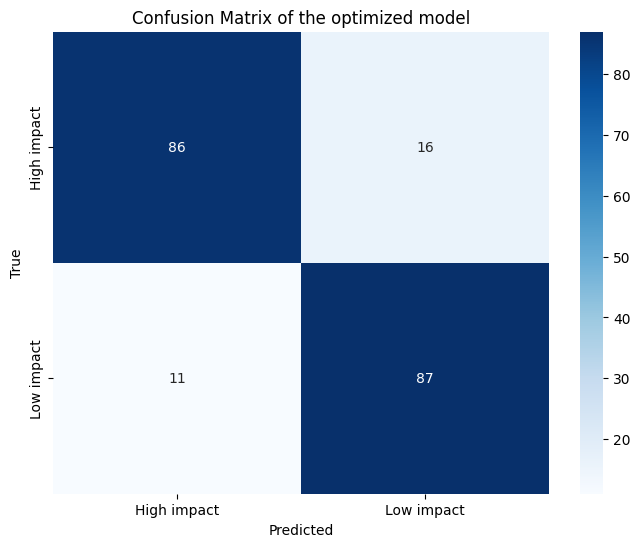

Classification Report:
                      precision    recall  f1-score   support

High impact activity       0.89      0.84      0.86       102
 low impact activity       0.84      0.89      0.87        98

            accuracy                           0.86       200
           macro avg       0.87      0.87      0.86       200
        weighted avg       0.87      0.86      0.86       200



In [111]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimized)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High impact', 'Low impact'], yticklabels=['High impact', 'Low impact'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of the optimized model')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_optimized, target_names=['High impact activity', 'low impact activity']))

## Discussion And Conclusion


#### Comparison of Performance:
- **Accuracy**: The optimized model achieved higher accuracy (86%) compared to the vanilla model (83%).
- **Loss**: The optimized model had a lower test loss (0.29), indicating better-calibrated predictions (0.36).
- **Confusion Matrix**: The optimized model showed fewer misclassifications.
- **Classification Report**: The precision, recall, and F1-score were higher for the optimized model, reflecting improved performance.

#### Interpretation:
- The optimizations such as dropout, Adam optimizer, and deeper architecture improved the model's ability to generalize and achieve better results on the test set.

#### Conclusion:
- The optimized model outperformed the basic/vanilla model across all key metrics, suggesting that the enhancements significantly improved model performance.
